#### Spot a quiet zone and Slice it out

In [9]:
import librosa

# Load full audio
y, sr = librosa.load(r"ConvertedAudioFiles\my_voice.wav")

# Define the noise-only range (in seconds)
start_sec, end_sec = 6.9, 7.5      # <-- adjust based on your quiet zone

# Convert to sample indexes
start_sample = int(start_sec * sr)
end_sample   = int(end_sec   * sr)

# Extract the noise clip
noise_clip = y[start_sample:end_sample]


#### Verify visualy

If it looks like a soft, continuous color wash without sharp lines, you’ve got your fingerprint. The one with no visible harmonics or bursts is the purest noise profile


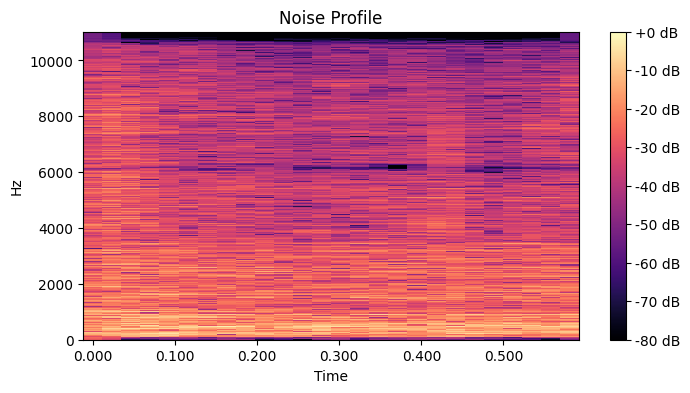

In [10]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

S = librosa.stft(noise_clip)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

plt.figure(figsize=(8, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.f dB")
plt.title("Noise Profile")
plt.show()

Testing noise floore before denoising.
If output says -53.4 dBFS, you’re already in the “good” zone.


In [ ]:
# RMS to dBFS
rms = np.sqrt(np.mean(y**2))
dbfs = 20 * np.log10(rms)  # 0 dBFS = max digital level
print(f"Noise floor: {dbfs:.1f} dBFS")

# output: Noise floor: -30.7 dBFS  (Audible hiss in quiet spots before denoising)